In [16]:
import tensorflow as tf
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
from os import path
import shutil
from keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
import glob


dtype = torch.float
device = torch.device("cpu")

In [1]:
data_dir = './chest_xray/test'
img_height = 180
img_width = 180
batchSize =32

In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(data_dir, shuffle=False, 
                                                      batch_size=batchSize,
                                                      image_size=(img_height, img_width)
                                                 )

Found 624 files belonging to 3 classes.


In [5]:
class_names = test_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA_BACTERIAL', 'PNEUMONIA_VIRUS']


In [17]:
normal_count = len(glob.glob(data_dir+"/NORMAL/*"))
pneumonia_virus = len(glob.glob(data_dir+"/PNEUMONIA_VIRUS/*"))
pneumonia_bacterial = len(glob.glob(data_dir+"/PNEUMONIA_BACTERIAL/*"))

<BarContainer object of 3 artists>

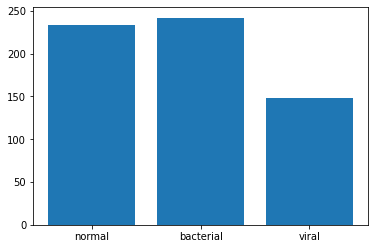

In [18]:
plt.bar(x=["normal", "bacterial", "viral"], height=[normal_count, pneumonia_bacterial, pneumonia_virus])

In [12]:
new_model = tf.keras.models.load_model('saved_model8/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)       

In [13]:
loss, acc = new_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

20/20 - 7s - loss: 0.7791 - accuracy: 0.7708 - 7s/epoch - 365ms/step
Restored model, accuracy: 77.08%


In [12]:
print(history)

[0.38192078471183777, 0.8397239446640015]


In [14]:
from collections import defaultdict 
new_model_hist = defaultdict(list) 
with open("./result_model8.txt",'r') as f:     
    key = ""     
    Lines = f.readlines()     
    key_line = ["loss", "accuracy", "val_loss", "val_accuracy"]     
    for line in Lines:         
        line = line.strip()         
        if  line in key_line:             
            key = line                                    
        else:             
            new_model_hist[key].append(float(line)) 

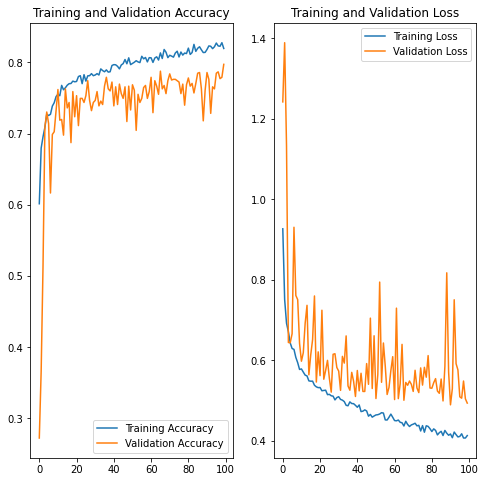

In [15]:
acc = new_model_hist['accuracy']
val_acc = new_model_hist['val_accuracy']

loss = new_model_hist['loss']
val_loss = new_model_hist['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()